## OpenCV Tutorials

[Histgram backprojection](http://lang.sist.chukyo-u.ac.jp/classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_histogram_backprojection/py_histogram_backprojection.html#histogram-backprojection)

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

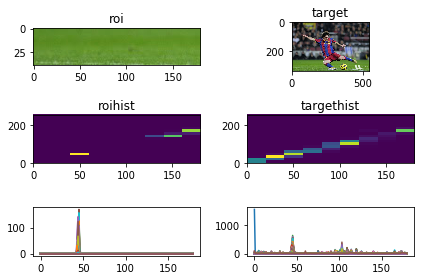

In [4]:
#roi is the object or region of object we need to find
#roi = cv2.imread('rose_red.jpg')[350:750,2300:2800]
roi = cv2.imread('messi5.jpg')[280:320,10:190]
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

#target is the image we search in
target = cv2.imread('messi5.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
rgbt = cv2.cvtColor(hsvt,cv2.COLOR_HSV2RGB)

# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
targethist = cv2.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax1.imshow(rgb)
ax1.set_title("roi")
ax2 = fig.add_subplot(322)
ax2.imshow(rgbt)
ax2.set_title("target")

# 2D histgramm of HS
ax3 = fig.add_subplot(323)
ax3.hist2d(hsv[0].flatten(),hsv[1].flatten(), bins=[np.linspace(0,180,10),np.linspace(0,256,20)])
ax3.set_title('roihist')
ax4 = fig.add_subplot(324)
ax4.hist2d(hsvt[0].flatten(),hsvt[1].flatten(), bins=[np.linspace(0,180,10),np.linspace(0,256,20)])
ax4.set_title('targethist')

# histgram of HS
ax5 = fig.add_subplot(325)
ax5.plot(roihist)
ax6 = fig.add_subplot(326)
ax6.plot(targethist)

plt.tight_layout()
plt.show()


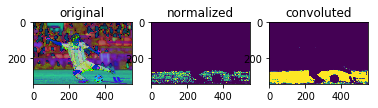

In [11]:
# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cnv = dst.copy()
cv2.filter2D(cnv,-1,disc,cnv)

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(hsvt)
ax1.set_title("original")
ax2 = fig.add_subplot(132)
ax2.imshow(dst)
ax2.set_title("normalized")
ax3 = fig.add_subplot(133)
ax3.imshow(cnv)
ax3.set_title("convoluted")

plt.show()

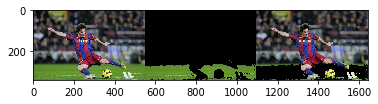

In [12]:
# threshold and binary AND
ret,thresh = cv2.threshold(cnv,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh)) #1->3channel
detected = cv2.bitwise_and(rgbt,thresh)
rthresh = cv2.bitwise_not(thresh)
bg = cv2.bitwise_and(rgbt,rthresh)

res = np.hstack((rgbt,detected,bg))
plt.imshow(res)
plt.show()